# Slovakia EDA

# Predicting the number of active cases in Slovakia.

# Goal of the project - To recommend timeline for reopening/lockdown. For this, the main quantities that we'll be trying to estimate throughout time for a given region are:

#Number of available beds at hospitals.
#Number of active cases.
#Number of cumulated deaths.
#Number of recovered.

In [1]:
##2- Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore") 

pandas- allows easy manipulation of data structures
NumPy- allows scientific computing
sklearn- A machine learning library for python
Matplotlib -is a library for creating static, animated, and interactive visualizations in Python.
Seaborn -is a data visualization library in Python based on matplotlib.
SciPy is a scientific computation library that uses NumPy underneath

In [3]:
##3- Loading the dataset

In [4]:
# Reading CSV File
df=pd.read_csv(r'C:\Users\DELL\Downloads\linear-comprehensive-covid-data.csv')

In [5]:
df.head()
#basic data analysis,quick view of data set
#showes first five rows of the data set

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
df.shape

(74866, 59)

In [7]:
df.info()
#Summary of data frame, including the index datatype and column dtypes, non-null values and memory usage
#This method prints information about a DataFrame including the index dtype and column dtypes,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

# Exploratory data analysis for the country Slovakia. From covid 19 world dataset Select data where location=Slovakia

In [8]:
df_slovakia=df[(df['location']=='Slovakia')]

In [9]:
print("The shape of the data frame is", (df_slovakia.shape))
print("The columns of the data frame are" , (df_slovakia.columns))

The shape of the data frame is (374, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vac

# Number of missing values per column.

In [10]:
# number of missing value per column
df_slovakia.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              26
new_deaths                                26
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  26
new_deaths_per_million                    26
new_deaths_smoothed_per_million            5
reproduction_rate                         14
icu_patients                             374
icu_patients_per_million                 374
hosp_patients                             62
hosp_patients_per_million                 62
weekly_icu_admissions                    374
weekly_icu

# Remove unnecessary columns,columns having lot of missing values,and columns having duplicate name

In [11]:
df_slovakia.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','new_vaccinations','new_vaccinations_smoothed',
                  'location','iso_code','continent','location','new_vaccinations_smoothed_per_million','people_fully_vaccinated','people_fully_vaccinated_per_hundred',
                    'people_vaccinated','people_vaccinated_per_hundred','weekly_icu_admissions_per_million','weekly_icu_admissions','weekly_hosp_admissions_per_million',
                  'weekly_hosp_admissions','total_vaccinations','total_vaccinations_per_hundred','continent','iso_code'],axis=1, inplace=True)

# Drop the  duplicate variables with  different scale


In [12]:
df_slovakia.drop(['new_cases_smoothed_per_million','new_cases_per_million','hosp_patients_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
'new_tests_per_thousand','new_tests_smoothed_per_thousand','total_tests_per_thousand','total_deaths_per_million','total_cases_per_million',                ],axis=1,inplace=True)

In [13]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        374 non-null    object 
 1   total_cases                 374 non-null    float64
 2   new_cases                   374 non-null    float64
 3   new_cases_smoothed          369 non-null    float64
 4   total_deaths                348 non-null    float64
 5   new_deaths                  348 non-null    float64
 6   new_deaths_smoothed         369 non-null    float64
 7   reproduction_rate           360 non-null    float64
 8   hosp_patients               312 non-null    float64
 9   new_tests                   373 non-null    float64
 10  total_tests                 373 non-null    float64
 11  new_tests_smoothed          366 non-null    float64
 12  positive_rate               367 non-null    float64
 13  tests_per_case              3

# change object data type to numeric data type

In [14]:
#convert date to date-time
#date-time fromat to numeric

In [15]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date'])

In [16]:
#date-time fromat to numeric dqta type
df_slovakia['date'] = pd.to_numeric(df_slovakia['date'])

# #change "test_units"object to numeric data type

In [17]:
df_slovakia["tests_units"].value_counts()

tests performed    373
Name: tests_units, dtype: int64

In [18]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_slovakia['tests_units'])

In [19]:
## add "test_performed" to df_slovakia data frame
df_slovakia = pd.concat([df_slovakia,test_performed], axis=1)

In [20]:
#drop "tests_units"
df_slovakia.drop(['tests_units'],axis=1,inplace=True)

In [21]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        374 non-null    int64  
 1   total_cases                 374 non-null    float64
 2   new_cases                   374 non-null    float64
 3   new_cases_smoothed          369 non-null    float64
 4   total_deaths                348 non-null    float64
 5   new_deaths                  348 non-null    float64
 6   new_deaths_smoothed         369 non-null    float64
 7   reproduction_rate           360 non-null    float64
 8   hosp_patients               312 non-null    float64
 9   new_tests                   373 non-null    float64
 10  total_tests                 373 non-null    float64
 11  new_tests_smoothed          366 non-null    float64
 12  positive_rate               367 non-null    float64
 13  tests_per_case              3

#  Exploratory data analysis

In [22]:
##Univariate analysis and Imputation

In [23]:
print(df_slovakia.isnull().values.sum())

175


In [24]:
df_slovakia.isnull().sum()

date                           0
total_cases                    0
new_cases                      0
new_cases_smoothed             5
total_deaths                  26
new_deaths                    26
new_deaths_smoothed            5
reproduction_rate             14
hosp_patients                 62
new_tests                      1
total_tests                    1
new_tests_smoothed             8
positive_rate                  7
tests_per_case                13
stringency_index               7
population                     0
population_density             0
median_age                     0
aged_65_older                  0
aged_70_older                  0
gdp_per_capita                 0
extreme_poverty                0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
male_smokers                   0
hospital_beds_per_thousand     0
life_expectancy                0
human_development_index        0
tests performed                0
dtype: int

Text(0.5, 1.0, 'Histogram of reproduction_rate')

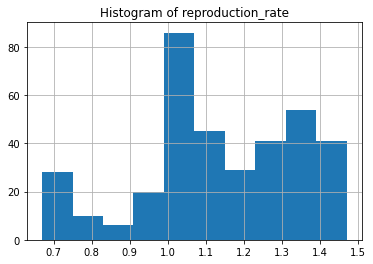

In [25]:
#new_cases_smoothed 
df_slovakia.reproduction_rate.hist()
plt.plot()
plt.title('Histogram of reproduction_rate')

data is not normally distributed .fill the missing value with median

In [26]:
df_slovakia["reproduction_rate"].fillna(df_slovakia["reproduction_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of positive_rate')

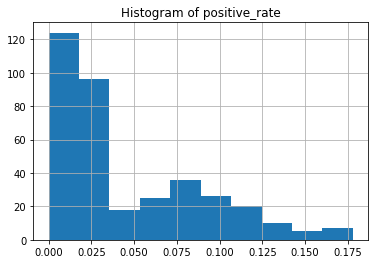

In [27]:
#new_cases_smoothed 
df_slovakia.positive_rate.hist()
plt.plot()
plt.title('Histogram of positive_rate')

In [28]:
df_slovakia["positive_rate"].fillna(df_slovakia["positive_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of total_tests')

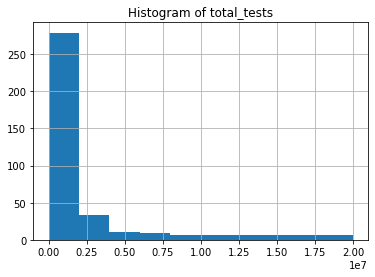

In [29]:
#total_tests
df_slovakia.total_tests.hist()
plt.plot()
plt.title('Histogram of total_tests')

In [30]:
df_slovakia["total_tests"].fillna(df_slovakia["total_tests"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests_smoothed')

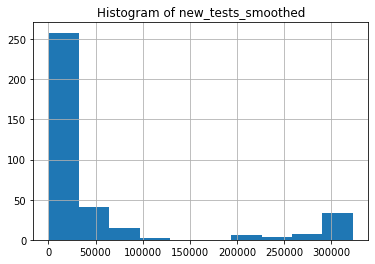

In [31]:
#new_tests_smoothed
df_slovakia.new_tests_smoothed.hist()
plt.plot()
plt.title('Histogram of new_tests_smoothed')

In [32]:
df_slovakia["new_tests_smoothed"].fillna(df_slovakia["new_tests_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of total_deaths')

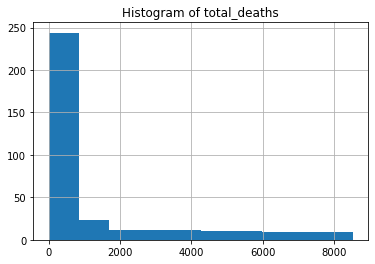

In [33]:
#total_deaths and new_deaths and new_deaths_smoothed
df_slovakia.total_deaths.hist()
plt.plot()
plt.title('Histogram of total_deaths')

Text(0.5, 1.0, 'Histogram of new_deaths')

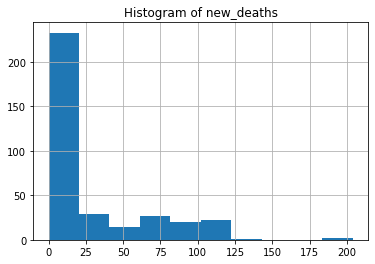

In [34]:
df_slovakia.new_deaths.hist()
plt.plot()
plt.title('Histogram of new_deaths')

Text(0.5, 1.0, 'Histogram of hosp_patients')

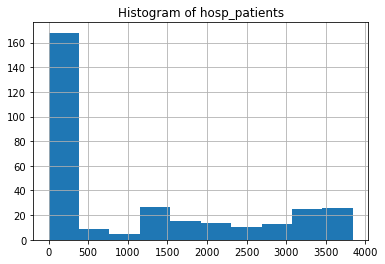

In [35]:
df_slovakia.hosp_patients.hist()
plt.plot()
plt.title('Histogram of hosp_patients')

All the graphs are right skewed, repalce missing value with median.

In [36]:
#hosp_patients
df_slovakia["hosp_patients"].fillna(df_slovakia["hosp_patients"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests')

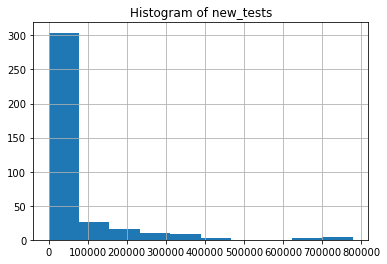

In [37]:
#new_tests
df_slovakia.new_tests.hist()
plt.plot()
plt.title('Histogram of new_tests')

#graph is not distributed normally,it is right skewed

In [38]:
df_slovakia["new_tests"].fillna(df_slovakia["new_tests"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of tests_per_case')

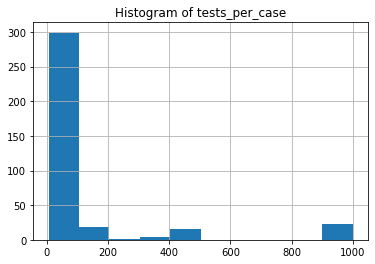

In [39]:
#total_deaths_per_million
df_slovakia.tests_per_case.hist()
plt.plot()
plt.title('Histogram of tests_per_case')

In [40]:
df_slovakia["tests_per_case"].fillna(df_slovakia["tests_per_case"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of stringency_index')

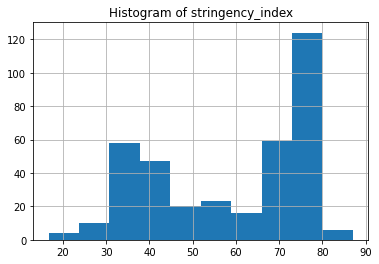

In [41]:
#new_deaths_per_million
df_slovakia.stringency_index.hist()
plt.plot()
plt.title('Histogram of stringency_index')

In [42]:
df_slovakia["stringency_index"].fillna(df_slovakia["stringency_index"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_cases_smoothed')

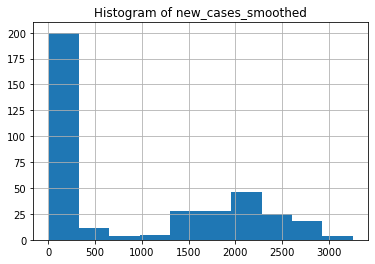

In [43]:
#new_cases_smoothed
df_slovakia.new_cases_smoothed.hist()
plt.plot()
plt.title('Histogram of new_cases_smoothed')

this graph is rightskewed,replace with median value

In [44]:
df_slovakia["new_cases_smoothed"].fillna(df_slovakia["new_cases_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of total deaths')

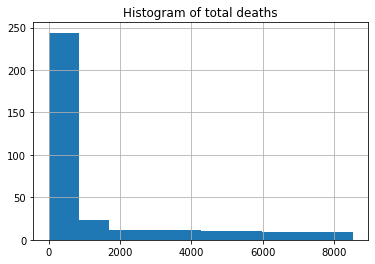

In [45]:
#total_deaths
df_slovakia.total_deaths.hist()
plt.plot()
plt.title('Histogram of total deaths')

In [46]:
df_slovakia["total_deaths"].fillna(df_slovakia["total_deaths"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_deaths')

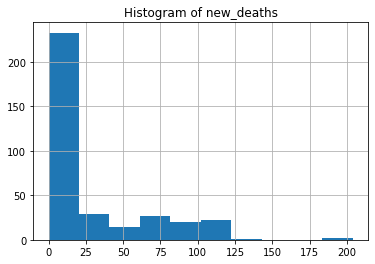

In [47]:
#total_deaths
df_slovakia.new_deaths.hist()
plt.plot()
plt.title('Histogram of new_deaths')

In [48]:
df_slovakia["new_deaths"].fillna(df_slovakia["new_deaths"].median(), inplace = True)
#as it is right skewed

Text(0.5, 1.0, 'Histogram of new_deaths_smoothed')

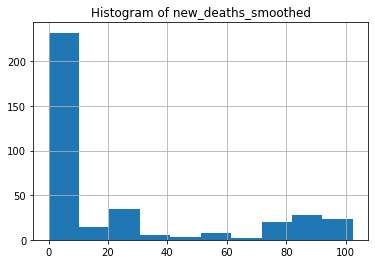

In [49]:
#total_deaths
df_slovakia.new_deaths_smoothed.hist()
plt.plot()
plt.title('Histogram of new_deaths_smoothed')

In [50]:
df_slovakia["new_deaths_smoothed"].fillna(df_slovakia["new_deaths_smoothed"].median(), inplace = True)
#as it is right skewed

In [51]:
# before filling up the missing value ,check the skewness of data
df_slovakia.isnull().sum()

date                          0
total_cases                   0
new_cases                     0
new_cases_smoothed            0
total_deaths                  0
new_deaths                    0
new_deaths_smoothed           0
reproduction_rate             0
hosp_patients                 0
new_tests                     0
total_tests                   0
new_tests_smoothed            0
positive_rate                 0
tests_per_case                0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
tests performed               0
dtype: int64

df_slovakia data set variales are right skewed,repalce the missing value with median value

## Bivariate Analysis  with our target variable - Active Cases

Text(0.5, 1.0, 'New_cases vs date')

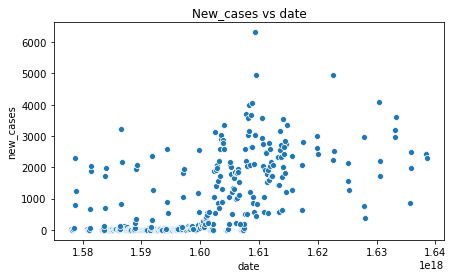

In [52]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['date'], y=df_slovakia['new_cases'])
plt.title('New_cases vs date')

new_cases increase with time.they are correlated .we will take date pto develope our model

Text(0.5, 1.0, 'New_cases vs new_cases_smoothed')

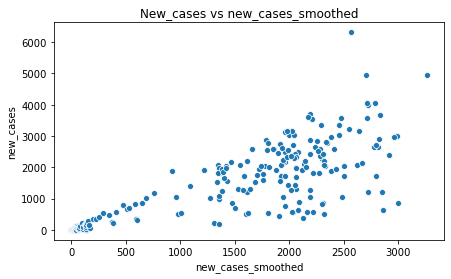

In [53]:
#new_cases_smoothed
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_smoothed'], y=df_slovakia['new_cases'])
plt.title('New_cases vs new_cases_smoothed')

new_cases and new_cases_smoothed are correlated .we will take new_cases_smoothed to  develope our model

Text(0.5, 1.0, 'New_cases vs total_deaths')

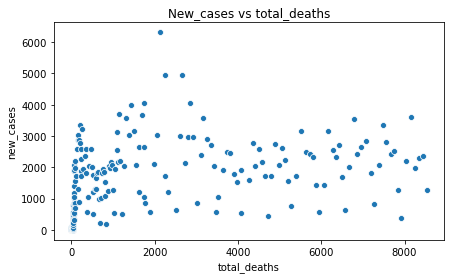

In [54]:
#total deaths
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_deaths'], y=df_slovakia['new_cases'])
plt.title('New_cases vs total_deaths')

new_cases and total_deaths are correlated .we will take total deaths to  develope our model

Text(0.5, 1.0, 'New_cases vs total_cases')

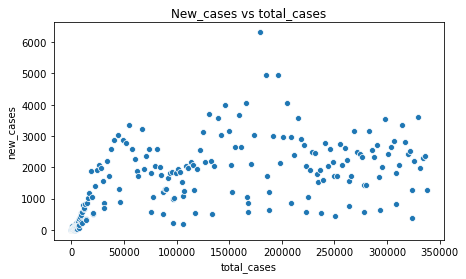

In [55]:
#total deaths
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_cases'], y=df_slovakia['new_cases'])
plt.title('New_cases vs total_cases')

we will take total_cases to develop our model 

Text(0.5, 1.0, 'New_cases vs new_deaths_smoothed')

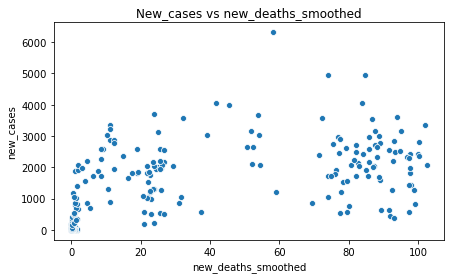

In [56]:
#total deaths smoothed
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths_smoothed'], y=df_slovakia['new_cases'])
plt.title('New_cases vs new_deaths_smoothed')

new_cases and _smoothed are correlated .we will take new_deaths_smoothed to  develope our model

Text(0.5, 1.0, 'hosp_patients vs new_cases')

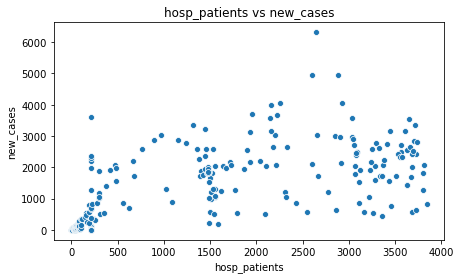

In [57]:
#hosp_patients
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['hosp_patients'], y=df_slovakia['new_cases'])
plt.title('hosp_patients vs new_cases')

new_cases and hospital_patients are correlated .we will take hospital_patients to  develope our model

Text(0.5, 1.0, 'new_cases vs total_cases')

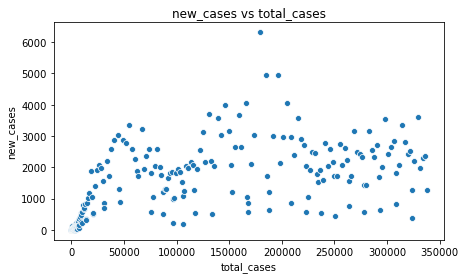

In [58]:
#total_cases
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_cases'], y=df_slovakia['new_cases'])
plt.title('new_cases vs total_cases')

take total_cases to develop our model

 Features selection

Drop features
If a feature has no relation with target variable remove the feature and take the other feature to predict the model,select the features where corr score is stronrg with target variable.

In [59]:
#drop
df_slovakia.drop(['aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','extreme_poverty','female_smokers',
                 'gdp_per_capita','human_development_index','life_expectancy','male_smokers','median_age','population_density',
                 'tests_per_case','tests performed','hospital_beds_per_thousand'],axis=1,inplace=True)

# # #correlation map

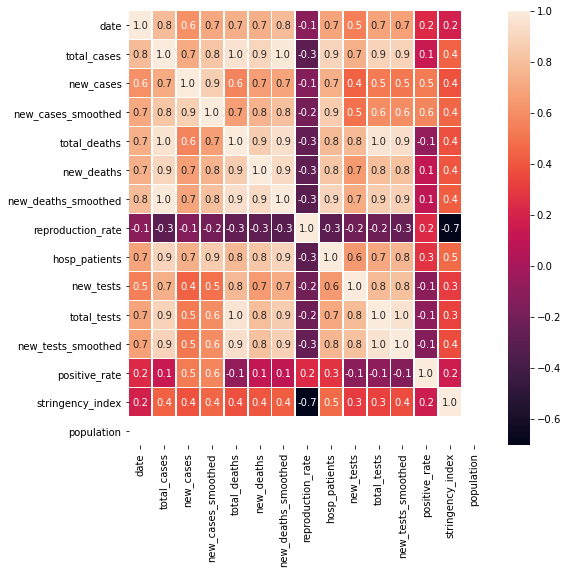

In [60]:
#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_slovakia.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [61]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    int64  
 1   total_cases          374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   total_deaths         374 non-null    float64
 5   new_deaths           374 non-null    float64
 6   new_deaths_smoothed  374 non-null    float64
 7   reproduction_rate    374 non-null    float64
 8   hosp_patients        374 non-null    float64
 9   new_tests            374 non-null    float64
 10  total_tests          374 non-null    float64
 11  new_tests_smoothed   374 non-null    float64
 12  positive_rate        374 non-null    float64
 13  stringency_index     374 non-null    float64
 14  population           374 non-null    float64
dtypes: float64(14), int64(1)
memory us

# 7- Model building

In [62]:

#normalize data
df_slovakia=(df_slovakia)/df_slovakia.max()

# #Linear Regression model

## Data splitting

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_data = df_slovakia['new_cases']
x_data = df_slovakia[['date','hosp_patients','new_cases_smoothed','new_deaths_smoothed','positive_rate','new_tests',
                   'total_cases','total_deaths']]

## Model training

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
x_data.head(5)

number of test samples : 75
number of training samples: 299


,date,hosp_patients,new_cases_smoothed,new_deaths_smoothed,positive_rate,new_tests,total_cases,total_deaths
60393,0.971103,0.05557,0.04023,0.006971,0.134831,0.000485,0.000003,0.004632
60394,0.972685,0.05557,0.04023,0.006971,0.134831,0.000085,0.000003,0.004632
60395,0.974320,0.05557,0.04023,0.006971,0.134831,0.000098,0.000009,0.004632
60396,0.975954,0.05557,0.04023,0.006971,0.134831,0.000089,0.000009,0.004632
60397,0.977536,0.05557,0.04023,0.006971,0.134831,0.000142,0.000021,0.004632


In [65]:
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_hat=lm.predict(x_test)
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )

Coefficients:  [-0.48365734 -0.01582379  0.53711618 -0.00193812  0.04070635  0.05616003
 -0.05540385  0.03512805]
Intercept:  0.4665018653181372
Train score : 0.7755733680912533
Test score : 0.7160112460951008


In [66]:
## Model evaluation

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.009930142954519413

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.009930142954519413

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Y_hat)

0.050082859362662636

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_hat)

0.7160112460951008

# Evaluate the model using K-fold cross validation for the original country.

In [71]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=10)
scores

array([0.82737241, 0.55749086, 0.80605441, 0.7436339 , 0.68820604,
       0.64222359, 0.87316153, 0.8037224 , 0.76092268, 0.69573463])

In [72]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=10)
scores

array([0.82737241, 0.55749086, 0.80605441, 0.7436339 , 0.68820604,
       0.64222359, 0.87316153, 0.8037224 , 0.76092268, 0.69573463])

In [73]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.01061597, -0.00925743, -0.0115155 , -0.00568922, -0.00783012])

# The SIR Epidemic Model

##A simple mathematical description of the spread of a disease in a population is the so-called SIR model,which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:
S(t) are those susceptible but not yet infected with the disease.
I(t) is the number of infectious individuals
R(t) are those individuals who have recovered from the disease and now have immunity to it.

Model - Susceptible > Infected > Removed

The model is started with a single infected individual on day 0: I(0)=1( from data set)
S, I and R represent the number of susceptible,infected,and recovered individuals, and N = S + I + R is the total population.

In [74]:
# Total population, N.
N=5459643    #slovakia population

#beta-the transmission rate constant.(reproduction_rate from data set)
#expected amount of people  an infected person infect perday
beta=df_slovakia['reproduction_rate'].mean()

D=14       #D= no of days an infected person has and can spread the disease(like 14-21days)

#gamma-removal rate(the proportion of infected removed per day)
gamma=1/D
R0 = beta/gamma       #The total number of people an infected person infects((R0 = β/γ))
#R0=basic reproduction number,
#The R0 (pronounced “R naught”), the basic reproduction number, is a mathematical estimate of how infectious a disease is and indicates the number of people an infected individual will go on to infect.
print(R0)

10.761904761904779


In [75]:
from scipy.integrate import odeint
import numpy as np

In [76]:
# The SIR model differential equations.
def deriv(x, t,beta, gamma):
    s,i,r =x
    dsdt= -(beta * s * i)/N
    didt=(beta *s *i)/N - gamma * i
    drdt=gamma * i
    return [dsdt,didt,drdt]

In [77]:
#initial condition
i0 = 1                                   #new_cases on first day of our dataset 
r0 = 0
s0=N-i0 - r0                            # Everyone else,S0,is susceptible to infection initially.

In [78]:
# A grid of time points (in days)
t=np.linspace(0,200,200)
x0=s0,i0,r0

In [79]:
# Integrate the SIR equations over the time grid, t.
soln = odeint(deriv, x0, t, args=(beta,gamma))
s,i,r=soln.T

Text(0, 0.5, 'Fraction')

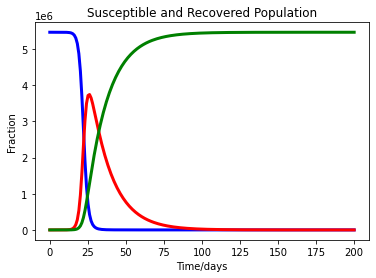

In [80]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(t, s, 'b' ,lw=3, label='Fraction susceptible')
ax.plot(t, i, 'r' ,lw=3, label='Fraction infected')
ax.plot(t, r, 'g' ,lw=3, label='Recovered with immunity')
ax.set_title('Susceptible and Recovered Population')
ax.set_xlabel('Time/days')
ax.set_ylabel('Fraction')

The number of infected cases increases for a certain time period, and then eventually decreases given that individuals
recover/decease from the disease.

The susceptible fraction of population decreases as the virus is transmited, to eventually drop to the absorbent state 0.

we can bring down the infected population by decreasing the beta value(transmission rate),that is the-expected amount of
people an infected person infect perday, susceptible population can decrease by vaccination drive.

# Conclusion

With our Regression model we can predict the active cases of a country.
Depending on our active cases Government can imposed restrictions.